<a href="https://colab.research.google.com/github/pndang/Project_WHEL/blob/main/random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Author: Phu Dang
# Date: 03.02.2023
# Mentor: Professor Niema Moshiri, Niema Lab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import roc_curve, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [4]:
cd /content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Preprocessed-Data

/content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Preprocessed-Data


In [5]:
# Loading dataset

df = pd.read_csv('ovrt.csv')
df.head()

,Unnamed: 0,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
0,0,1245,-32.312500,-20.0,-40.0,-2.0,-12.5,-50.0,-0.1697,-0.0465,...,193.992493,-1.905000,8.29750,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520
1,1,1256,-36.687500,-5.0,10.0,-3.0,-50.0,-37.5,0.0980,-0.0966,...,722.049988,-5.290000,-6.13250,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996
2,2,1265,-6.312500,-5.0,-10.0,2.0,-12.5,0.0,0.0349,-0.1795,...,499.857483,-38.457500,1.31500,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000
3,3,1266,0.437500,-10.0,0.0,2.0,25.0,-12.5,-0.1125,-0.1744,...,299.345032,35.095001,-5.08750,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951
4,4,1276,30.646484,30.0,5.0,-1.0,25.0,37.5,0.0766,0.0213,...,51.471191,4.437499,-1.35375,-67.597503,0.7600,49091.856445,28144.247949,284.864999,92.692444,-1542.129974


In [6]:
df.shape

(655, 69)

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
0,1245,-32.312500,-20.0,-40.0,-2.0,-12.5,-50.0,-0.1697,-0.0465,0.3556,...,193.992493,-1.905000,8.297500,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520
1,1256,-36.687500,-5.0,10.0,-3.0,-50.0,-37.5,0.0980,-0.0966,0.0129,...,722.049988,-5.290000,-6.132500,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996
2,1265,-6.312500,-5.0,-10.0,2.0,-12.5,0.0,0.0349,-0.1795,-0.4249,...,499.857483,-38.457500,1.315000,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000
3,1266,0.437500,-10.0,0.0,2.0,25.0,-12.5,-0.1125,-0.1744,-0.4923,...,299.345032,35.095001,-5.087500,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951
4,1276,30.646484,30.0,5.0,-1.0,25.0,37.5,0.0766,0.0213,-0.0547,...,51.471191,4.437499,-1.353750,-67.597503,0.7600,49091.856445,28144.247949,284.864999,92.692444,-1542.129974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,13237,-2.875000,5.0,-15.0,1.0,0.0,0.0,-0.4909,0.0686,0.7054,...,778.665039,-15.582501,-2.377500,28.867503,-4.2725,953.305054,964.039978,76.027504,299.722534,17455.123047
651,13241,1.437500,5.0,5.0,-1.0,12.5,0.0,0.0065,0.0827,0.4094,...,-394.652527,8.437500,-2.780000,-3.692498,0.9900,-1166.187500,458.790023,-1468.800001,-799.239998,-7753.884999
652,13242,2.187500,5.0,5.0,2.0,-12.5,0.0,0.0932,-0.1789,0.2133,...,-738.780029,-34.210000,5.542500,-16.477497,0.3250,-2668.910055,-193.804963,-299.970001,-1525.382530,1057.294678
653,13243,9.937500,15.0,10.0,1.0,12.5,0.0,-0.0045,0.1245,-0.1687,...,392.342163,-40.800000,3.721312,122.134993,-3.4975,5834.960815,1415.401793,249.318362,3406.976135,20269.307617


In [9]:
df.groupby(by='recurrence').count().get('ID')

recurrence
0    629
1     26
Name: ID, dtype: int64

In [10]:
!ls

bcep_tf.csv  ovrt.csv  ovrt_phu.csv


In [11]:
df_phu = pd.read_csv('ovrt_phu.csv')
df_phu.head()

,Unnamed: 0,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,brcastatus,brcastatus_binary,lutein_ovt,cryptox_ovt,lycopene_ovt,alphacar_ovt,betacar_ovt
0,0,1018,-15.750000,5.0,0.0,0.0,-37.5,-12.5,0,0,-0.0347,0.0303,-0.0820,0.0918,0.8330
1,1,1019,1.855469,15.0,-15.0,0.0,-12.5,0.0,0,0,0.4003,0.0880,-0.0739,0.1937,0.3823
2,2,1022,-2.312500,0.0,-10.0,-2.0,-12.5,0.0,0,0,0.0056,-0.0503,-0.2200,0.0528,0.3148
3,3,1026,-7.769531,5.0,-5.0,2.0,0.0,-37.5,0,0,-0.1215,-0.3689,-0.3149,0.0722,0.3063
4,4,1027,9.625000,20.0,0.0,-1.0,12.5,37.5,0,0,0.1232,0.1394,0.4131,0.0773,0.9563


In [12]:
df_phu.groupby(by='brcastatus_binary').count().get('ID')

brcastatus_binary
0    1741
1     103
Name: ID, dtype: int64

In [13]:
np.arange(0, 68)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [14]:
df.columns

Index(['ID', 'QOL_ovt', 'energy_ovt', 'genhlth_ovt', 'optimism_ovt',
       'pain_ovt', 'socfctn_ovt', 'lutein_ovt', 'cryptox_ovt',
       'lycopene_ovt_x', 'alphacar_ovt', 'betacar_ovt', 'recurrence',
       'heightcm_ovt', 'weightkg_ovt', 'bmi_ovt', 'waistcm_ovt', 'hipcm_ovt',
       'pulse30_ovt', 'systolic_ovt', 'diastolic_ovt', 'anti-est_use_ovt',
       'anti-estro_type_ovt', '% protein_ovt', '% fat_ovt', '% carb_ovt',
       '% alcohol_ovt', 'caffeine_ovt', 'calcium_ovt', 'iron_ovt',
       'magnesium_ovt', 'phosphorus_ovt', 'potassium_ovt', 'sodium_ovt',
       'zinc_ovt', 'copper_ovt', 'selenium_ovt', 'alpha-toc_ovt',
       'gamma-toc_ovt', 'vit d_ovt', 'vitamin c_ovt', 'thiamin_ovt',
       'riboflavin_ovt', 'niacin_ovt', 'folacin_ovt', 'panto. acid_ovt',
       'vit b6_ovt', 'vit b12_ovt', 'cholesterol_ovt', 'diet fiber_ovt',
       'soluble fiber_ovt', 'insol. fiber_ovt', 'starch_ovt', 'sucrose_ovt',
       'galactose_ovt', 'fructose_ovt', 'lactose_ovt', 'maltose_ovt',
   

In [15]:
X = df.drop(['ID', 'recurrence'], axis=1)

# Converting data into numpy arrays
X = X.to_numpy()
y = df['recurrence']

In [16]:
len(X)

655

In [17]:
len(y)

655

In [18]:
# Spltting dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5)

In [19]:
# Initiating model
clf = RandomForestClassifier(n_estimators = 100)

# Training model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Make predictions on the test set

y_preds = clf.predict(X_test)

In [21]:
# Get accuracy

acc = metrics.accuracy_score(y_test, y_preds)

# Useless performance metric due to imbalanced data
print(f'Model accuracy: {acc}')

Model accuracy: 0.9573170731707317


## Handle imbalanced data 
Method: Up-sample Minority Class

Result: Overfitting

In [22]:
# Separate majority and minority classes
df_major = df[df['recurrence'] == 0]
df_minor = df[df['recurrence'] == 1]

# Upsample minority class
df_minor_up = resample(df_minor,
                       replace=True,
                       n_samples=629,
                       random_state=1)

df_up = pd.concat([df_major, df_minor_up])

In [23]:
df_minor.head()

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
8,1288,-6.750000,-15.000000,-10.0,-1.0,-12.5,-12.5,0.0435,0.1865,-0.0753,...,-472.347473,28.245000,-12.9275,97.202499,-0.6175,-3993.172577,-555.369996,-13.660000,975.280029,12281.685196
41,1403,4.250000,10.000000,20.0,0.0,0.0,0.0,-0.0250,-0.0669,0.2878,...,-409.837524,3.857500,-8.3325,-85.742500,-0.6475,-3254.652527,-928.307500,75.960001,-705.169975,1359.242371
52,1445,0.271484,-3.328125,-5.0,-1.0,0.0,-12.5,-0.1322,0.0051,-0.1276,...,-56.205078,-0.807500,0.3900,-31.395001,-2.4150,690.190063,1116.434991,61.142497,-1535.379913,-4395.797501
90,1563,-33.000000,-15.000000,-20.0,-2.0,-50.0,-50.0,-0.1803,-0.0641,-0.0653,...,-345.790009,-32.947501,-0.8700,-10.697500,-2.1250,-3907.012512,-602.619993,47.575002,-1360.074982,-1941.460022
108,3280,9.896484,-5.000000,5.0,1.0,-62.5,50.0,-0.2478,-0.0051,0.1218,...,344.562500,2.047500,-5.5625,-35.340003,0.0900,-973.017517,-212.574997,-1.117500,456.589996,1559.562500


In [24]:
df_minor_up.head()

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
118,3299,7.292969,0.0,0.0,2.0,0.0,0.0,-0.0577,-0.0268,0.2490,...,-1518.956706,-7.393334,-8.216667,-30.206667,-1.660000,-255.756662,16.306667,0.013333,-127.093327,-277.916667
255,5508,-11.750000,0.0,-5.0,1.0,-25.0,0.0,-0.0848,0.0220,0.1828,...,288.173737,9.265001,14.613750,-44.309999,-0.690000,11768.432365,4680.322280,12.917502,-1084.150055,-159.377502
266,5527,-2.125000,-15.0,-5.0,0.0,0.0,0.0,0.2386,-0.0127,0.6467,...,57.990845,11.990000,-1.234167,-98.586664,-0.923333,31351.715495,17645.738957,-140.430002,1173.903158,10369.663411
201,5347,8.917969,10.0,-5.0,0.0,-25.0,-25.0,-0.0035,0.0220,0.8151,...,649.729980,-5.190000,6.937500,318.357505,1.015000,21698.767334,7852.067738,252.510001,8063.437500,-1603.772583
226,5445,-12.957031,-5.0,5.0,0.0,-12.5,-37.5,-0.0357,0.0638,0.1279,...,-9.297058,-23.537500,23.866408,834.996256,-0.390000,30163.461914,11280.704065,508.454996,11298.326660,1205.565033


In [25]:
df_up

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
0,1245,-32.312500,-20.0,-40.0,-2.0,-12.5,-50.0,-0.1697,-0.0465,0.3556,...,193.992493,-1.905000,8.29750,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520
1,1256,-36.687500,-5.0,10.0,-3.0,-50.0,-37.5,0.0980,-0.0966,0.0129,...,722.049988,-5.290000,-6.13250,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996
2,1265,-6.312500,-5.0,-10.0,2.0,-12.5,0.0,0.0349,-0.1795,-0.4249,...,499.857483,-38.457500,1.31500,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000
3,1266,0.437500,-10.0,0.0,2.0,25.0,-12.5,-0.1125,-0.1744,-0.4923,...,299.345032,35.095001,-5.08750,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951
4,1276,30.646484,30.0,5.0,-1.0,25.0,37.5,0.0766,0.0213,-0.0547,...,51.471191,4.437499,-1.35375,-67.597503,0.7600,49091.856445,28144.247949,284.864999,92.692444,-1542.129974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,5313,4.667969,10.0,-5.0,-1.0,0.0,0.0,0.0533,0.1371,0.1351,...,-95.442444,-10.675000,5.63500,47.990000,-1.1650,-754.959961,-300.837512,239.027496,1184.470078,1798.219971
345,7398,10.958984,-30.0,-25.0,0.0,25.0,75.0,0.0768,0.0051,0.5724,...,-561.815002,-0.837500,4.13250,29.802500,2.8025,3467.165039,1622.742456,97.995002,623.379944,3699.122559
624,13182,-0.875000,10.0,10.0,0.0,-25.0,0.0,-0.0065,-0.0387,-0.1237,...,-390.157471,6.127501,1.88250,21.259998,1.8850,-3739.515045,-1603.915018,-80.007499,1140.139893,-4488.322449
345,7398,10.958984,-30.0,-25.0,0.0,25.0,75.0,0.0768,0.0051,0.5724,...,-561.815002,-0.837500,4.13250,29.802500,2.8025,3467.165039,1622.742456,97.995002,623.379944,3699.122559


In [26]:
# Re-train model with new dataset
X = df_up.drop(['ID', 'recurrence'], axis=1)

# Converting data into numpy arrays
X = X.to_numpy()
y = df_up['recurrence']

# Spltting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5)

In [27]:
# Initiating model
clf_1 = RandomForestClassifier(n_estimators = 100)

# Training model
clf_1.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Make predictions
y_preds = clf_1.predict(X_test)

In [29]:
# Get accuracy
acc = metrics.accuracy_score(y_test, y_preds)

print(f'Model accuracy: {acc}')

Model accuracy: 1.0


In [30]:
y_preds

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [31]:
y_test

283    1
443    0
624    1
290    1
499    0
      ..
56     0
256    0
444    0
316    0
171    0
Name: recurrence, Length: 629, dtype: int64

In [32]:
# sanity check

test = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, test)

In [33]:
acc

0.7154213036565977

Method: Upsampling minority class and downsampling majority class

In [34]:
# Separate majority and minority classes
df_major = df[df['recurrence'] == 0]
df_minor = df[df['recurrence'] == 1]

# Upsample minority class
df_minor_up = resample(df_minor,
                       replace=True,
                       n_samples=100,
                       random_state=1)

# Downsample majority class
df_major_down = resample(df_major,
                         replace=False,
                         n_samples=100,
                         random_state=1)

In [35]:
df_new = pd.concat([df_minor_up, df_major_down])

In [36]:
df_new['recurrence'].value_counts()

1    100
0    100
Name: recurrence, dtype: int64

In [37]:
X = df_new.drop(['ID', 'recurrence'], axis=1)
X = X.to_numpy()
y = df_new['recurrence']

# Spltting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5)

In [38]:
# Re-train new model with new dataset

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
len([x for x in y_test if x == 1])

51

In [40]:
# Make predictions

y_preds = clf_2.predict(X_test)

In [41]:
acc = metrics.accuracy_score(y_test, y_preds)
print(f'Accuracy: {acc}')

Accuracy: 0.9


In [42]:
confusion_matrix(y_test, y_preds)

array([[45,  4],
       [ 6, 45]])

In [43]:
# sanity check

actual = list(y_test)

num_pos = len([z for z in y_test if z == 1])
num_neg = len([z for z in y_test if z == 0])
correct_pos, false_pos, correct_neg, false_neg = 0, 0, 0, 0
for i in range(len(y_preds)):
  if y_preds[i] == 1:
    if y_preds[i] == actual[i]:
      correct_pos += 1
    else:
      false_pos += 1
  else:
    if y_preds[i] == actual[i]:
      correct_neg += 1
    else:
      false_neg += 1

print(f'True Neg: {correct_neg}  False Pos: {false_pos}')
print(f'False Neg: {false_neg}  True Pos: {correct_pos}')

True Neg: 45  False Pos: 4
False Neg: 6  True Pos: 45


In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

print('Confusion Matrix\n')
print(f'True Negative: {tn}  False Positive: {fp}')
print(f'False Negative: {fn}  True Positive: {tp}\n')

acc = (tp+tn)/(tp+tn+fp+fn)
pr = tp/(tp+fp) 
re = tp/(tp+fn) # aka sensitivity - tells us what prop of the pos class is correctly classified
f1 = (2*tp)/(2*tp+fp+fn)
print(f'Accuracy: {acc}\nPrecision: {pr}\nRecall: {re}\nF1: {f1}')

Confusion Matrix

True Negative: 45  False Positive: 4
False Negative: 6  True Positive: 45

Accuracy: 0.9
Precision: 0.9183673469387755
Recall: 0.8823529411764706
F1: 0.9


In [45]:
# Get the probabiltiies for each class

y_probs = clf_2.predict_proba(X_test)

In [46]:
len(y_probs)

100

In [53]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_preds)))

score = roc_auc_score(y_test, y_probs[:, 1])
# score_0 = roc_auc_score(y_test, y_probs[:, 0])
print(f"ROC AUC: {score:.4f}\n")
# print(f"ROC AUC: {score_0:.4f}\n")

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_preds, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_preds, target_names=['no recurrence', 'recurrence']))



Accuracy: 0.90

ROC AUC: 0.9524

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

               precision    recall  f1-score   support

no recurrence       0.88      0.92      0.90        49
   recurrence       0.92      0.88      0.90        51

     accuracy                           0.90       100
    macro avg       0.90      0.90      0.90       100
 weighted avg       0.90      0.90      0.90       100



## Plotting ROC (Receiver Operator Characteristic) Curve

Credit: https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077

In [57]:
# Function to calculate TPR and FPR for each prediction probabilities threshold

def calculate_tpr_fpr(y_real, y_pred):
  cm = confusion_matrix(y_real, y_pred)
  tn = cm[0, 0]
  fp = cm[0, 1]
  fn = cm[1, 0]
  tp = cm[1, 1]

  tpr = tp/(tp+fn)
  fpr = 1 - tn/(tn+fp)

  return tpr, fpr


# Function to get coordinates for ROC curve

def get_n_roc_coordinates(y_real, y_probs, n = 50):
  tpr_list = [0]
  fpr_list = [0]
  for i in range(n):
    threshold = i/n
    y_pred = y_probs[:, 1] > threshold
    tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

  return tpr_list, fpr_list


# ^ INCOMPLETE MANUAL PLOTTING
#  Scikit-Learn approach below

Text(0.5, 1.0, 'Bad ROC Curve')

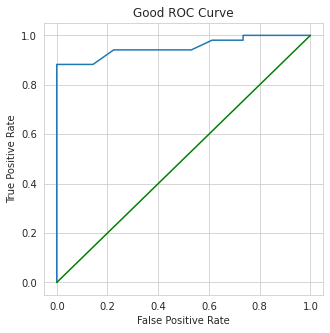

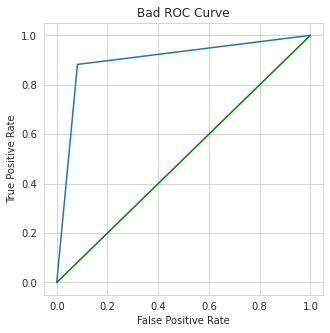

In [65]:
# Plotting ROC Curve using scikit-learn

def plot_sklearn_roc_curve(y_real, y_pred):
  fpr, tpr, _ = roc_curve(y_real, y_pred)
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
  roc_display.figure_.set_size_inches(5, 5)
  plt.plot([0, 1], [0, 1], color = 'g')

# Plot ROC curve using prediction probabilities (good)
plot_sklearn_roc_curve(y_test, y_probs[:, 1])
plt.title('Good ROC Curve')

# Plot ROC curve using binary predictions (bad)
plot_sklearn_roc_curve(y_test, y_preds)
plt.title('Bad ROC Curve')